Group work - Solution steps of the Rubik's Cube.

# Exploration of Projection Spaces

In [1]:
# Feel free to add dependencies, but make sure that they are included in environment.yml

#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import altair as alt
from altair import datum
alt.data_transformers.disable_max_rows()

from sklearn import manifold, decomposition
from openTSNE import TSNE
#from openTSNE.callbacks import ErrorLogger # not working for NB-AI
from umap import UMAP

/home/c/anaconda3/envs/xai_proj_space/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data
To be able to explore paths in a projected space, you need to pick a problem/algorithm/model that consists of multiple states that change iteratively.

<details>
    <summary><a>Click to see an Example</a></summary>

    
An example is the solving of a Rubik's Cube. After each rotation the state of the cube changes. This results in a path from the initial state, through the individual rotations, to the solved cube.
By using projection, we can examine the individual states and paths in the two-dimensional space.
Depending on the initial state and the solution strategy the paths will differ or resemble each other.
    
This is an example of solving 10 randomly scrambled Rubik's Cubes with two different strategies, the Beginner (in green) and the Fridrich Method (in orange):
<div>
    <img alt="Rubiks's Cube Sovling Strategies" src="rubiks.png" width="600"/>
</div>
You can see that although each cube is scrambled differently in the beginning, both strategies converge to the same paths after a few steps.
You can also notice that the Beginner's method takes some additional paths that are not necessary with the Fridrich method.
</details>

### Read and Prepare Data
Sorting list in an efficient way is a crucial and essential topic in computer science. Therefore, it is worth to have a closer look at this topic. The target is the comparison of different sorting algorithms of a list filled with integers. The list is the fixed problem and only needs to be generated once. The different sorting algorithms shall deal with the same list. In the upcoming text the chosen alogorithms are in short explained. This list is not exhaustive as there are more sorting algorithms, like the Mergesort, Quicksort, and Radixsort with Bucketsort. Information about the functionality and code of the algorithms is extracted from a lecture, namely "Algorithmen und Datenstrukturen I".
1. Bubblesort<br>
Two adjacent elements are compared and eventually swapped. 
2. Selectionsort<br>
Find the minimum value and put it at index 0. Find second smallest value and insert it at index 1. Go on until the array is sorted.
3. Insertionsort<br>
Go from element to element. Each element is sorted into the elements which are already looked at.
4. Shellsort<br>
Divide the sequence into subfields. Sort those by Insertionsort. For instance, starting at index 0 take every fourth element. Those elements are compared with each other. Then go on with every fith element and son on. Finally, sort the elements by looking at the adjacencies. 
5. Heapsort<br>
Create a binary heap and sort it according to removeMin(). Afterwards put the result in the final array. 


In upcoming section the data and the sorting algorithms are implemented. 


In [2]:
# Generate unsorted array filled with integers:
np.random.seed = 0
unsorted_list = np.random.randint(low=-100, high=101, size=20).tolist()

# normalize unsorted list such that it doesn't have to be done in the resulting dataset:
mean_list = np.mean(unsorted_list)
std_list = np.std(unsorted_list)
unsorted_list = (unsorted_list-mean_list)/std_list

In [3]:
# 1. Bubblesort

def bubblesort(list_=unsorted_list.copy()):

    one_ele = [1]
    one_ele.extend(list_)
    store_array = np.asarray(one_ele).reshape((1,-1))

    for i in range(len(list_)-1):
        
        for j in range(len(list_)-1,i,-1):
            
            if list_[j]<list_[j-1]:
                # swap neighbours:
                after = list_[j]
                list_[j] = list_[j-1]
                list_[j-1] = after
            one_ele = [1]
            one_ele.extend(list_)
            store_array = np.concatenate((store_array, np.array(one_ele).reshape((1,-1))), axis=0)

    return store_array

store_array_bubble = bubblesort()
store_array_bubble

array([[ 1.        , -0.84139094, -1.26208641, ..., -0.51630808,
         1.31945397,  0.82226842],
       [ 1.        , -0.84139094, -1.26208641, ..., -0.51630808,
         0.82226842,  1.31945397],
       [ 1.        , -0.84139094, -1.26208641, ..., -0.51630808,
         0.82226842,  1.31945397],
       ...,
       [ 1.        , -1.81663953, -1.7019044 , ...,  1.05173867,
         1.31945397,  1.41506658],
       [ 1.        , -1.81663953, -1.7019044 , ...,  1.05173867,
         1.31945397,  1.41506658],
       [ 1.        , -1.81663953, -1.7019044 , ...,  1.05173867,
         1.31945397,  1.41506658]])

In [4]:
# 2. Selectionsort

def selectionsort(list_=unsorted_list.copy()):
    list_ = list_.tolist()

    buffer_list = list_.copy()
    swap_ind = 0
    
    one_ele = [1]
    one_ele.extend(list_)
    store_array = np.asarray(one_ele).reshape((1,-1))

    while(len(buffer_list)>0):
        found_min = min(buffer_list)
        buffer_list.remove(found_min)
        put_in_ind = list_.index(found_min)
        list_[put_in_ind] = list_[swap_ind]
        list_[swap_ind] = found_min
        swap_ind += 1
    
        one_ele = [1]
        one_ele.extend(list_)
        store_array = np.concatenate((store_array, np.asarray(one_ele).reshape(1,-1)), axis=0)

    return store_array

store_array_selection = selectionsort()
store_array_selection

array([[ 1.        , -0.84139094, -1.26208641, -0.70753329,  0.6310432 ,
         1.41506658, -0.93700355,  1.05173867,  0.47806303,  0.17210269,
         1.01349363,  1.01349363, -1.7019044 , -0.03824504,  0.87963598,
        -0.05736756, -1.81663953, -0.91788103, -0.51630808,  1.31945397,
         0.82226842],
       [ 1.        , -1.81663953, -1.26208641, -0.70753329,  0.6310432 ,
         1.41506658, -0.93700355,  1.05173867,  0.47806303,  0.17210269,
         1.01349363,  1.01349363, -1.7019044 , -0.03824504,  0.87963598,
        -0.05736756, -0.84139094, -0.91788103, -0.51630808,  1.31945397,
         0.82226842],
       [ 1.        , -1.81663953, -1.7019044 , -0.70753329,  0.6310432 ,
         1.41506658, -0.93700355,  1.05173867,  0.47806303,  0.17210269,
         1.01349363,  1.01349363, -1.26208641, -0.03824504,  0.87963598,
        -0.05736756, -0.84139094, -0.91788103, -0.51630808,  1.31945397,
         0.82226842],
       [ 1.        , -1.81663953, -1.7019044 , -1.26208641

In [5]:
# 3. Insertionsort

def insertionsort(list_=unsorted_list.copy(), h=1):
    
    one_ele = [1]
    one_ele.extend(list_)
    store_array = np.asarray(one_ele).reshape((1,-1))

    for i in range(h, len(list_)):
        j = i
        elem = list_[i]

        while j >= 1 and (elem < list_[j-h]):
            list_[j] = list_[j-h]
            j -= h

        list_[j] = elem
            
        one_ele = [1]
        one_ele.extend(list_)
        store_array = np.concatenate((store_array, np.asarray(one_ele).reshape(1,-1)), axis=0)

    return store_array, list_

store_array_insertion, _ = insertionsort()
store_array_insertion

array([[ 1.        , -0.84139094, -1.26208641, -0.70753329,  0.6310432 ,
         1.41506658, -0.93700355,  1.05173867,  0.47806303,  0.17210269,
         1.01349363,  1.01349363, -1.7019044 , -0.03824504,  0.87963598,
        -0.05736756, -1.81663953, -0.91788103, -0.51630808,  1.31945397,
         0.82226842],
       [ 1.        , -1.26208641, -0.84139094, -0.70753329,  0.6310432 ,
         1.41506658, -0.93700355,  1.05173867,  0.47806303,  0.17210269,
         1.01349363,  1.01349363, -1.7019044 , -0.03824504,  0.87963598,
        -0.05736756, -1.81663953, -0.91788103, -0.51630808,  1.31945397,
         0.82226842],
       [ 1.        , -1.26208641, -0.84139094, -0.70753329,  0.6310432 ,
         1.41506658, -0.93700355,  1.05173867,  0.47806303,  0.17210269,
         1.01349363,  1.01349363, -1.7019044 , -0.03824504,  0.87963598,
        -0.05736756, -1.81663953, -0.91788103, -0.51630808,  1.31945397,
         0.82226842],
       [ 1.        , -1.26208641, -0.84139094, -0.70753329

In [6]:
# 4. Shellsort

def shellsort(list_=unsorted_list.copy()):
    
    one_ele = [1]
    one_ele.extend(list_)
    store_array = np.asarray(one_ele).reshape((1,-1))

    # determine relevant increment depending on array/list size:
    h = 1
    while h <= int((len(list_) - 1) / 9): # the maximal value h can take is found
        h = 3 * h + 1

    while h > 0: # count down h

        store_array_small, list_ = insertionsort(list_=list_, h=h)

        h = int(h/3)
        
        store_array = np.concatenate((store_array, store_array_small), axis=0)

    return store_array

store_array_shell = shellsort()
store_array_shell

array([[ 1.        , -0.84139094, -1.26208641, -0.70753329,  0.6310432 ,
         1.41506658, -0.93700355,  1.05173867,  0.47806303,  0.17210269,
         1.01349363,  1.01349363, -1.7019044 , -0.03824504,  0.87963598,
        -0.05736756, -1.81663953, -0.91788103, -0.51630808,  1.31945397,
         0.82226842],
       [ 1.        , -0.84139094, -1.26208641, -0.70753329,  0.6310432 ,
         1.41506658, -0.93700355,  1.05173867,  0.47806303,  0.17210269,
         1.01349363,  1.01349363, -1.7019044 , -0.03824504,  0.87963598,
        -0.05736756, -1.81663953, -0.91788103, -0.51630808,  1.31945397,
         0.82226842],
       [ 1.        , -0.84139094, -1.26208641, -0.70753329,  0.6310432 ,
         1.41506658, -0.93700355,  1.05173867,  0.47806303,  0.17210269,
         1.01349363,  1.01349363, -1.7019044 , -0.03824504,  0.87963598,
        -0.05736756, -1.81663953, -0.91788103, -0.51630808,  1.31945397,
         0.82226842],
       [ 1.        , -0.84139094, -1.26208641, -0.70753329

In [7]:
# 5. Heapsort
# slightly modified code from https://www.geeksforgeeks.org/python-program-for-heap-sort/

def heapify(arr, n, i):
      
    largest = i  # Initialize largest as root
    l = 2 * i + 1  # left child index
    r = 2 * i + 2  # right child index
 
    # See if left child of root exists and is greater than root:
    if l < n and arr[i] < arr[l]: # when this is the case the left child will become the new root by
        # changing its position with the current root!
        largest = l
 
    # See if right child of root exists and is greater than root:
    if r < n and arr[largest] < arr[r]:
        largest = r
 
    # Change root, if needed: 
    if largest != i:
        (arr[i], arr[largest]) = (arr[largest], arr[i])  # swap
 
        # Heapify the root:
        global depth
        global store_array_heap

        one_ele = [depth]
        one_ele.extend(arr)
        store_array_heap = np.concatenate((store_array_heap, np.asarray(one_ele).reshape(1,-1)), axis=0)
        heapify(arr, n, largest)
 
 
def heapsort(arr=unsorted_list.copy()):
    
    global depth
    depth = 1
    global store_array_heap
    
    one_ele = [depth]
    one_ele.extend(arr)
    store_array_heap = np.asarray(one_ele).reshape((1,-1))
    
    n = len(arr)
    depth = 0
     
    # Build a maxheap.
    # Since last parent will be at ((n//2)-1) we can start at that location.
    for i in range(n // 2 - 1, -1, -1): # i starts as root index
        depth += 1
        
        heapify(arr, n, i) # n never changes 
 
    # One by one extract elements
    for i in range(n - 1, 0, -1):
        (arr[i], arr[0]) = (arr[0], arr[i])  # swap
        heapify(arr, i, 0)
        
    return 
 

heapsort()

store_array_heap

array([[ 1.        , -0.84139094, -1.26208641, ..., -0.51630808,
         1.31945397,  0.82226842],
       [ 2.        , -0.84139094, -1.26208641, ..., -0.51630808,
         0.17210269,  0.82226842],
       [ 5.        , -0.84139094, -1.26208641, ..., -0.51630808,
         0.17210269,  0.82226842],
       ...,
       [10.        , -0.91788103, -1.26208641, ...,  1.05173867,
         1.31945397,  1.41506658],
       [10.        , -0.93700355, -1.26208641, ...,  1.05173867,
         1.31945397,  1.41506658],
       [10.        , -1.26208641, -1.81663953, ...,  1.05173867,
         1.31945397,  1.41506658]])

In [8]:
# Create data frames:
col_names = ['depth']+[f'position{i}' for i in range(len(unsorted_list))]

bubble_frame = pd.DataFrame(store_array_bubble, columns=col_names)
bubble_frame.insert(0, 'sorting_alg', 'bubble')

selection_frame = pd.DataFrame(store_array_selection, columns=col_names)
selection_frame.insert(0, 'sorting_alg', 'selection')

insertion_frame = pd.DataFrame(store_array_insertion, columns=col_names)
insertion_frame.insert(0, 'sorting_alg', 'insertion')

shell_frame = pd.DataFrame(store_array_shell, columns=col_names)
shell_frame.insert(0, 'sorting_alg', 'shell')

heap_frame = pd.DataFrame(store_array_heap, columns=col_names)
heap_frame.insert(0, 'sorting_alg', 'heap')

# Bring all dataframes of the single sorting algorithms togehter to end up with an dataframe to work with:
final_frame = pd.concat((bubble_frame, selection_frame, insertion_frame, shell_frame, heap_frame),axis=0)

# Normalization: the values which were sorted are already normalized, but not the depth. 
# The Min-Max-Normalization is used because the the depth never gets negative its output range [0-1] fit 
# good:
#final_frame['depth'] = (final_frame['depth']-min(final_frame['depth']))/(max(final_frame['depth'])-min(final_frame['depth']))

final_frame = final_frame.reset_index(drop=True)
meta_data = final_frame.iloc[:, :2]
proj_data = final_frame.iloc[:, 2:]

starts = (meta_data['sorting_alg'] != meta_data['sorting_alg'].shift()).map({True: "start"})
ends = (meta_data['sorting_alg'] != meta_data['sorting_alg'].shift(-1)).map({True: "end"})
meta_data['events'] = starts.combine_first(ends)

# define a helper function to retrieve all list states
def create_list(row):
    return (np.array([row[col] for col in [f'position{i}' for i in range(len(unsorted_list))]]) * std_list + mean_list).astype(int)

# extract list states in metadate
meta_data['list_state'] = final_frame.apply(create_list , axis=1)

meta_data.head()

,sorting_alg,depth,events,list_state
0,bubble,1.0,start,"[-26, -48, -19, 51, 92, -31, 73, 43, 27, 71, 7..."
1,bubble,1.0,NaN,"[-26, -48, -19, 51, 92, -31, 73, 43, 27, 71, 7..."
2,bubble,1.0,NaN,"[-26, -48, -19, 51, 92, -31, 73, 43, 27, 71, 7..."
3,bubble,1.0,NaN,"[-26, -48, -19, 51, 92, -31, 73, 43, 27, 71, 7..."
4,bubble,1.0,NaN,"[-26, -48, -19, 51, 92, -31, 73, 43, 27, 71, 7..."


### Comments
> Introducing thoughts under the headline "Read and Prepare Data".

- Did you transform, clean, or extend the data?  How/Why?

> The data is generated by ourselves. The reason is that the sorting algorithms are very well suited in logging each state such that the process over time can be stored. The belonging variable is named "store_array" within the individual functions.<br> For the case a kind of tree is built up to support the sorting process the "depth" gets also stored. It starts by 1. With each layer it extends by 1.<br>The starting problem is an unsorted list generated by numpy using random integers in range between -100 and 100. The values are normalized with the z-transformation such that the normalization is no longer necessary in the later process. The z-transformation was chosen because it is well suited for both, positve and negative integer values. The size is set to 20 because the sorting problem should be big enough to cover all relevant cases.
<br><br>
After the "store_array" is achieved for all the algorithms, it is stored in form of a dataframe. All dataframes of the individual algorithms are then concatenated horizontally. The column "sorting_alg" gives information about the belonging sorting algorithm. "depth" gives the depth of each state and is normalized via Min-Max-Normalization. This kind of normalization fits as the depth is never negative and the range of this normalization is 0 to 1. <br>
The remaining column names relate to the position in the list to sort. For example, "position0" relates to the number which is located at index 0 of the list.<br><br>
For reasons of visualization, we added further information. First, column "events" was added to mark the starting and ending indices of the individual sorting algorithms. It helps to discriminate between the alogorithms when creating the dimensionality reduced visualization.
Even further, "list_state" shows the content of the list in the sorting process for each time step. In the later visualization it becomes possible to touch with the mouse arrow individual sample points such that the current list and the depth are given as information in a small text window. 


## Projection
Project your data into a 2D space.
Try multiple (3+) projection methods (e.g., t-SNE, UMAP, MDS, PCA, ICA, other methods) with different settings and compare them.

Make sure that all additional dependencies are included when submitting.

In [9]:
def gen_plot(coords, print_stats=False, dim_red_type=''):
    df_coords = pd.DataFrame(coords, columns=['X','Y'])
    data = pd.concat([meta_data, df_coords], axis='columns')
    
    range_ = ['red', 'green', 'blue', 'black', 'magenta', 'orange']

    if print_stats:
        print("\nStatistics:")
        display(df_coords.describe())
    
    display(alt.LayerChart(layer=[
        alt.Chart(data).mark_point(
        opacity=0.6,
        filled=True
    ).encode(
        x='X',
        y='Y',
        color=alt.Color("sorting_alg", scale=alt.Scale(range=range_)))
           # 'sorting_alg:N')
        ,alt.Chart(data
    ).mark_point(
        opacity=0.6,
        size=100
    ).encode(
        x='X',
        y='Y',
        color=alt.Color("sorting_alg", scale=alt.Scale(range=range_)),
            #'sorting_alg:N',
        shape='events:N'
    ).transform_filter((datum.events=='start') | (datum.events=='end'))]
    ).properties(
        width=700,
        height=700,
        title=dim_red_type +": Projected Sort States"
    ).interactive())

In [10]:
coords = manifold.TSNE(perplexity=15).fit_transform(proj_data)
gen_plot(coords, dim_red_type='TSNE (perplexity=15)')

alt.LayerChart(...)

In [11]:
coords = manifold.TSNE(perplexity=30).fit_transform(proj_data)
gen_plot(coords, dim_red_type='TSNE (perplexity=30)')

alt.LayerChart(...)

In [12]:
coords = manifold.TSNE(perplexity=15, init="random").fit_transform(proj_data)
gen_plot(coords, dim_red_type='TSNE (perplexity=15, init="random")')

alt.LayerChart(...)

In [13]:
coords = UMAP(n_neighbors=5).fit_transform(proj_data)
gen_plot(coords, dim_red_type='UMAP (n_neighbors=5)')

alt.LayerChart(...)

In [28]:
coords = UMAP(n_neighbors=50).fit_transform(proj_data)
gen_plot(coords, dim_red_type='UMAP (n_neighbors=50)')

alt.LayerChart(...)

In [15]:
coords = UMAP(n_neighbors=5, min_dist=0.5).fit_transform(proj_data)
gen_plot(coords, dim_red_type='UMAP (n_neighbors=5, min_dist=0.5)')

alt.LayerChart(...)

In [16]:
coords = UMAP(n_neighbors=5, min_dist=1).fit_transform(proj_data)
gen_plot(coords, dim_red_type='UMAP (n_neighbors=5, min_dist=1)')

alt.LayerChart(...)

In [17]:
coords = manifold.MDS(n_init=4).fit_transform(proj_data)
gen_plot(coords, dim_red_type='MDS (n_init=4)')

alt.LayerChart(...)

In [18]:
coords = manifold.MDS(n_init=10).fit_transform(proj_data)
gen_plot(coords, dim_red_type='MDS (n_init=10)')

alt.LayerChart(...)

In [19]:
coords = decomposition.PCA(n_components=2).fit_transform(proj_data)
gen_plot(coords, dim_red_type='PCA (n_components=2)')

alt.LayerChart(...)

In [20]:
coords = decomposition.FastICA(n_components=2).fit_transform(proj_data)
gen_plot(coords, dim_red_type='FastICA (n_components=2)')

alt.LayerChart(...)

### Comments
- Which features did you use? Why?

> The unsorted list consits of 20 bins for which each can carry one value. We used these 20 dimensions as basis of our dimensionality reduction as it is the most straight forward way to encode the sorting steps of a fixed sized list. 
- Which projection methods did you use? Why?

> We used a variety of dimensionality reduction methods to get an impression which of them fit best for a sorting task. For this reason we used
t-SNE, PCA, UMAP, MDS, and FastICA.

- Why did you choose these hyperparameters?

>t-SNE: The perplexity is the essential hyperparameter of t-SNE. It lays focus on the locality versus globality. For a lower value, and therefore more focus on local structures, sorting algorithms tend to be less scattered in their sorting steps. The points seem to be more aligned to follow a certain path up to the final sorting stage. <br><br>
>PCA: "n_components" gives us the number of eigenvalues which shall be considered in creation of the visualization. As each dimension is related to one eigenvalue we choose the both eigenvalues which explain the model variance the best by setting this hyperparameter to two. It follows, that we end up with a two-dimensional plot. This plot is enough to outline the differences between the algorithms but not in a perfect manner.<br><br>
>UMAP: The hyperparameter "n_neighbors" gives information about the local (small value) and global (high value) structure. Especially, bubble sort is impressed by a local setting. It tends to build up lots of tiny clusters which are wide-spread in the plot. Therefore, a higher n_neighbors value seems to be valid to build up a better understandable image in human eye.<br>
The second hyperparameter of interest is "min_dist". As the sorting task generates states which are more or less similar to each other, meaning the contained values always stay the same but change the positions, the points are already concentrated on a smaller localization area in the plot. Therefore, this hyperparameter doesn't have to much impact on our visualization.<br><br>
> MDS: "n_init" is described as "Number of times the SMACOF algorithm will be run with different initializations. The final results will be the best output of the runs, determined by the run with the smallest final stress." (https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html). However, in our case there doesn't seem to be a huge impact on the representation of data. It seems like that the initialitation is of subordinate priority.
<br><br>
> FastICA: Like in PCA, the "n_components" gives the information about the dimensionality of the visualization. In this context a two-dimensional presentation makes sense because we wouldn't get more insight in the nature of sorting by increasing the dimensionality.

- Are there patterns in the global _and_ the local structure?

> Yes, the effects are already described in the answer above.

### Link States
Connect the states that belong together.

The states of a single solution should be connected to see the path from the start to the end state.
How the points are connected is up to you, for example, with straight lines or splines.

In [21]:
#coords = manifold.TSNE(perplexity=15).fit_transform(proj_data)
coords = decomposition.FastICA(n_components=2).fit_transform(proj_data)

df_coords = pd.DataFrame(coords, columns=['X','Y'])
data = pd.concat([meta_data, df_coords], axis='columns')

#make index a column to connect the points in the right order
data = data.rename_axis('index1').reset_index()

In [22]:
alt.LayerChart(layer=[
    alt.Chart(data).mark_line(
    opacity=0.6
).encode(
    x='X',
    y='Y',
    color='sorting_alg:N', #color lines by solving attempt
    order='index:Q' # connect them in order (instead of position on x-axis)
),alt.Chart(data
).mark_point(
    opacity=0.6
).encode(
    x='X',
    y='Y',
    color='sorting_alg:N',
    shape='events:N'
).transform_filter((datum.events=='start') | (datum.events=='end'))]
).properties(
    width=700,
    height=700,
    title="Paths of solving attempts of different algorithms"
).interactive()

alt.LayerChart(...)

### Meta Data Encoding 
Encode addtional features in the visualization.

Use features of the source data and include them in the projection, e.g., by using color, opacity, different shapes, or line styles, etc.

In [23]:
def path_visualizer_meta(coords, dim_red_type: str):

    df_coords = pd.DataFrame(coords, columns=['X','Y'])
    data = pd.concat([meta_data, df_coords], axis='columns')

    #make index a column to connect the points in the right order
    data = data.rename_axis('index1').reset_index()

    range_ = ['red', 'green', 'blue', 'black', 'magenta', 'orange']
    
    return alt.LayerChart(layer=[
        alt.Chart(data).mark_line(
        opacity=0.6
    ).encode(
        x='X',
        y='Y',
        color='sorting_alg:N', #color lines by solving attempt
        order='index:Q', # connect them in order (instead of position on x-axis)
        tooltip=['depth', 'list_state'] # 'sorting_alg', 'depth'
    ),alt.Chart(data).mark_point(
        opacity=0.6,
        size=50,
        point=True,
        filled=True
    ).encode(
        x='X',
        y='Y',
        color=alt.Color("sorting_alg", scale=alt.Scale(range=range_))
            #'sorting_alg:N'
    ),alt.Chart(data).mark_point(
        opacity=0.6,
        size=100
    ).encode(
        x='X',
        y='Y',
        color=alt.Color("sorting_alg", scale=alt.Scale(range=range_)),
            #'sorting_alg:N',
        shape='events:N'
    ).transform_filter((datum.events=='start') | (datum.events=='end'))]
    ).properties(
        width=700,
        height=700,
        title= dim_red_type +": Paths of solving attempts of different algorithms"
    ).interactive()

In [24]:
coords = manifold.TSNE(perplexity=15).fit_transform(proj_data)
path_visualizer_meta(coords, dim_red_type='TSNE (perplexity=15)')

alt.LayerChart(...)

In [25]:
coords = manifold.TSNE(perplexity=30).fit_transform(proj_data)
path_visualizer_meta(coords, dim_red_type='TSNE (perplexity=30)')

KeyboardInterrupt: 

In [ ]:
coords = manifold.TSNE(perplexity=15, init="random").fit_transform(proj_data)
path_visualizer_meta(coords, dim_red_type='TSNE (perplexity=15, init="random")')

In [ ]:
coords = UMAP(n_neighbors=5).fit_transform(proj_data)
path_visualizer_meta(coords, dim_red_type='UMAP (n_neighbors=5)')

In [ ]:
coords = UMAP(n_neighbors=50).fit_transform(proj_data)
path_visualizer_meta(coords, dim_red_type='UMAP (n_neighbors=50)')

In [ ]:
coords = UMAP(n_neighbors=5, min_dist=0.5).fit_transform(proj_data)
path_visualizer_meta(coords, dim_red_type='UMAP (n_neighbors=5, min_dist=0.5)')

In [ ]:
coords = UMAP(n_neighbors=5, min_dist=1).fit_transform(proj_data)
path_visualizer_meta(coords, dim_red_type='UMAP (n_neighbors=5, min_dist=1)')

In [ ]:
coords = manifold.MDS(n_init=4).fit_transform(proj_data)
path_visualizer_meta(coords, dim_red_type='MDS (n_init=4)')

In [ ]:
coords = manifold.MDS(n_init=10).fit_transform(proj_data)
path_visualizer_meta(coords, dim_red_type='MDS (n_init=10)')

In [ ]:
coords = decomposition.PCA(n_components=2).fit_transform(proj_data)
path_visualizer_meta(coords, dim_red_type='PCA (n_components=2)')

In [ ]:
coords = decomposition.FastICA(n_components=2).fit_transform(proj_data)
path_visualizer_meta(coords, dim_red_type='FastICA (n_components=2)')

### Comments
- Which features did you use? Why?

> We included the depth of tree based sorting algorithms, because when adding more tree based algorithms, it might be interesting to compare depths. Additionally we provided the underlying array order of each step of the sorting algorithms to better investigate the current sorting state. 
- How are the features encoded?

> Both features are accessible via the Tooltip functionality of altair.

## Optional
<details>
    <summary><a>Projection Space Explorer (click to reveal)</a></summary>

    
<h2>Projection Space Explorer</h2>

The <a href="https://jku-vds-lab.at/pse/">Projection Space Explorer</a> is a web application to plot and connect two dimensional points. 
Metadata of the data points can be used to encode additonal information into the projection, e.g., by using different shapes or colors.
    
Further Information:
<ul>
    <li>Paper: <a href="https://jku-vds-lab.at/publications/2020_tiis_pathexplorer/">https://jku-vds-lab.at/publications/2020_tiis_pathexplorer/</a>
    <li>Repo: <a href="https://github.com/jku-vds-lab/projection-space-explorer/">https://github.com/jku-vds-lab/projection-space-explorer/</a>
    <li>Application Overview: <a href="https://jku-vds-lab.at/pse/">https://jku-vds-lab.at/pse/</a>
</ul>

<h3>Data Format</h3>
How to format the data can be found in the <a href="https://github.com/jku-vds-lab/projection-space-explorer/#data-format">Projection Space Explorer's README</a>.

Example data with three lines, with two colors (algo) and additional mark encoding (cp):

<table>
<thead>
  <tr>
    <th>x</th>
    <th>y</th>
    <th>line</th>
    <th>cp</th>
    <th>algo</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>0.0</td>
    <td>0</td>
    <td>0</td>
    <td>start</td>
    <td>1</td>
  </tr>
  <tr>
    <td>2.0</td>
    <td>1</td>
    <td>0</td>
    <td>state</td>
    <td>1</td>
  </tr>
  <tr>
    <td>4.0</td>
    <td>4</td>
    <td>0</td>
    <td>state</td>
    <td>1</td>
  </tr>
  <tr>
    <td>6.0</td>
    <td>1</td>
    <td>0</td>
    <td>state</td>
    <td>1</td>
  </tr>
  <tr>
    <td>8.0</td>
    <td>0</td>
    <td>0</td>
    <td>state</td>
    <td>1</td>
  </tr>
  <tr>
    <td>12.0</td>
    <td>0</td>
    <td>0</td>
    <td>end</td>
    <td>1</td>
  </tr>
  <tr>
    <td>-1.0</td>
    <td>10</td>
    <td>1</td>
    <td>start</td>
    <td>2</td>
  </tr>
  <tr>
    <td>0.5</td>
    <td>5</td>
    <td>1</td>
    <td>state</td>
    <td>2</td>
  </tr>
  <tr>
    <td>2.0</td>
    <td>3</td>
    <td>1</td>
    <td>state</td>
    <td>2</td>
  </tr>
  <tr>
    <td>3.5</td>
    <td>0</td>
    <td>1</td>
    <td>state</td>
    <td>2</td>
  </tr>
  <tr>
    <td>5.0</td>
    <td>3</td>
    <td>1</td>
    <td>state</td>
    <td>2</td>
  </tr>
  <tr>
    <td>6.5</td>
    <td>5</td>
    <td>1</td>
    <td>state</td>
    <td>2</td>
  </tr>
  <tr>
    <td>8.0</td>
    <td>10</td>
    <td>1</td>
    <td>end</td>
    <td>2</td>
  </tr>
  <tr>
    <td>3.0</td>
    <td>6</td>
    <td>2</td>
    <td>start</td>
    <td>2</td>
  </tr>
  <tr>
    <td>2.0</td>
    <td>7</td>
    <td>2</td>
    <td>end</td>
    <td>2</td>
  </tr>
</tbody>
</table>



Save the dataset to CSV, e.g. using pandas: <tt>df.to_csv('data_path_explorer.csv', encoding='utf-8', index=False)</tt>  
    and upload it in the Projection Space Explorer by clicking on `OPEN FILE` in the top left corner.
    
ℹ You can also include your high dimensionmal data and use it to adapt the visualization.
    
</details>


## Results
You may add additional screenshots of the Projection Space Explorer.

In [ ]:
# We create a csv file first. For this purpose we use the compressed data of t-SNE:
proj_space_expl = data.copy()
proj_space_expl['events'].fillna('state', inplace=True)
proj_space_expl.rename(columns={"X": "x", "Y": "y","events":"cp","sorting_alg":"algo"}, inplace=True)
proj_space_expl.replace({"bubble": 1, "selection": 2,"insertion":3,"shell":4,"heap":5}, inplace=True)
proj_space_expl["line"] = proj_space_expl["algo"]
proj_space_expl.drop(['list_state','depth','index1'],axis=1, inplace=True)
proj_space_expl.to_csv('data_path_explorer.csv', encoding='utf-8', index=False)

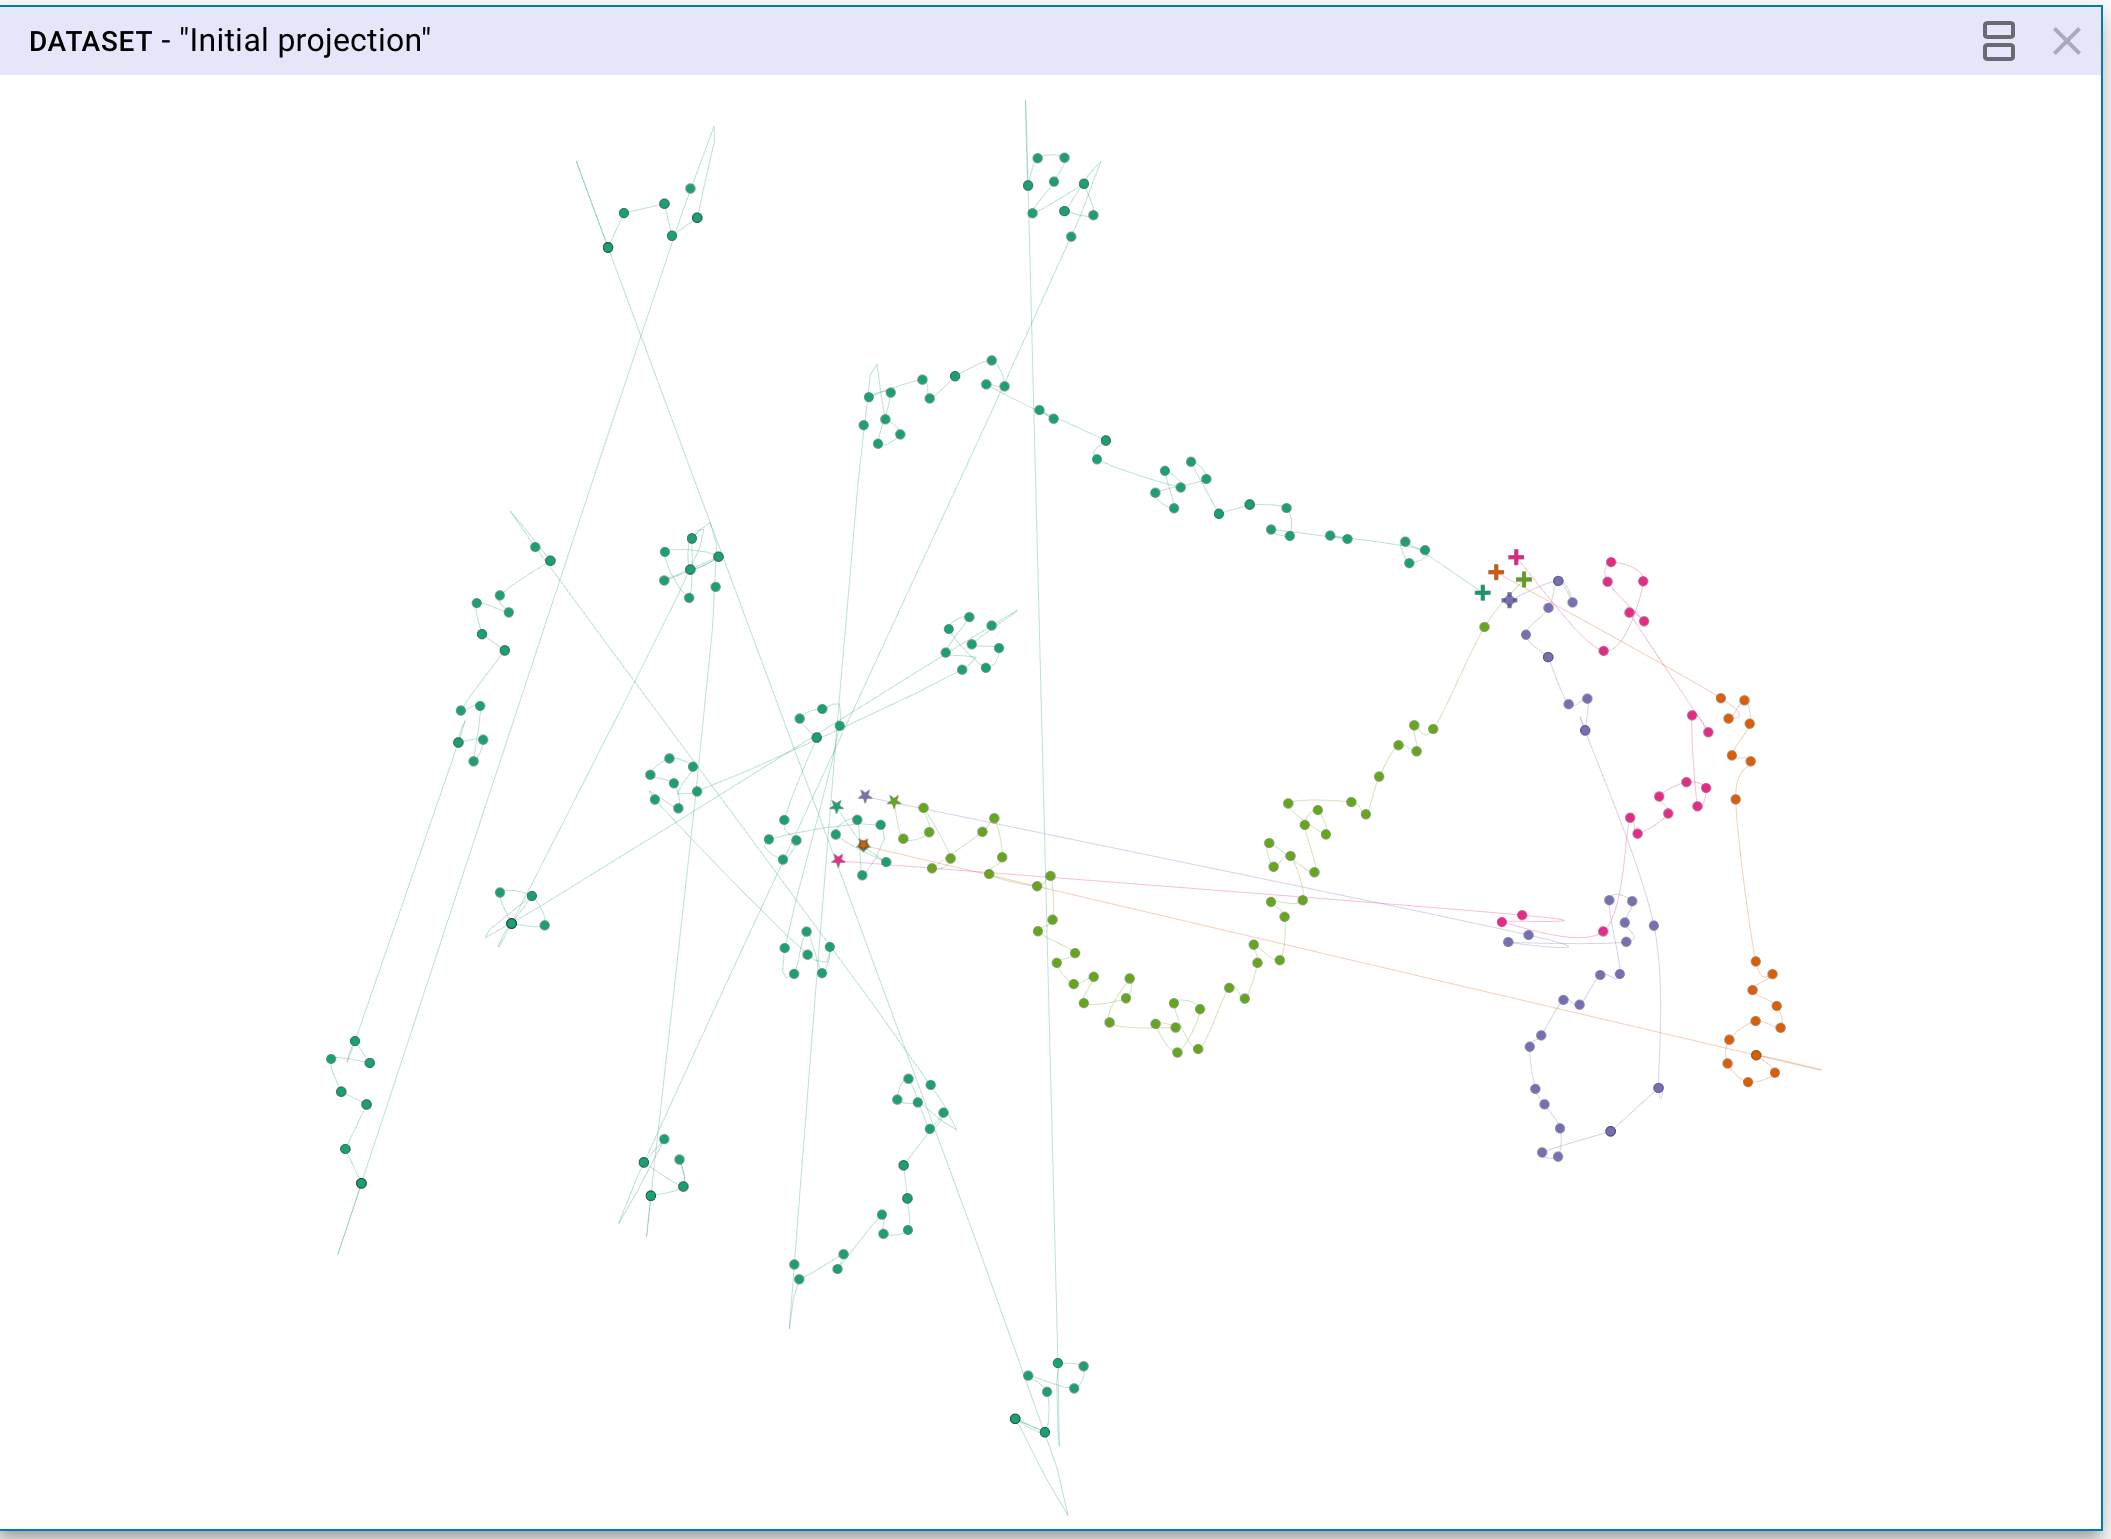

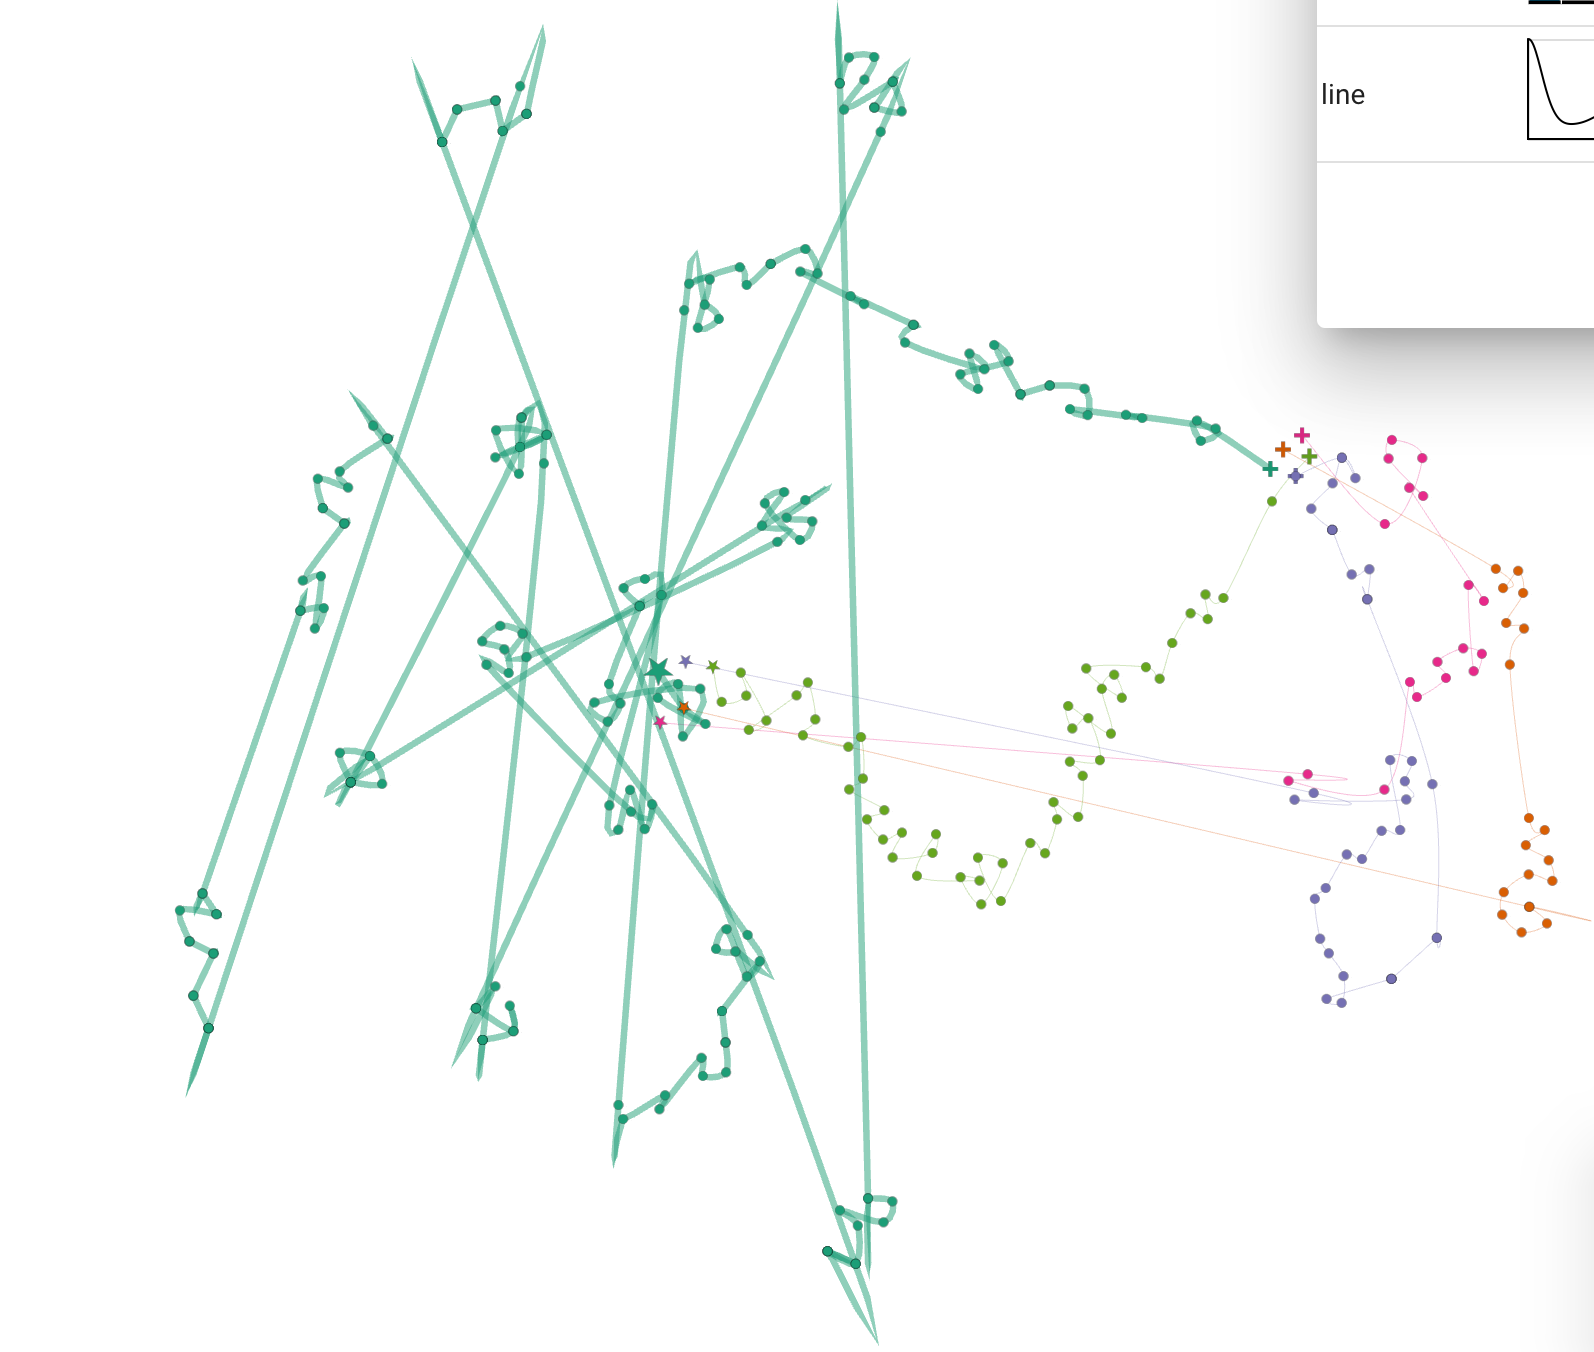

Through the screenshots it becomes clear that the Projection Space Explorer supplies a solid data representation. The individual algorithms are distinguished by color. The start and end states are represented by crosses and stars. Through a simple mouse click one sorting algorithm path can be outlined such that its process steps become clearly visible.

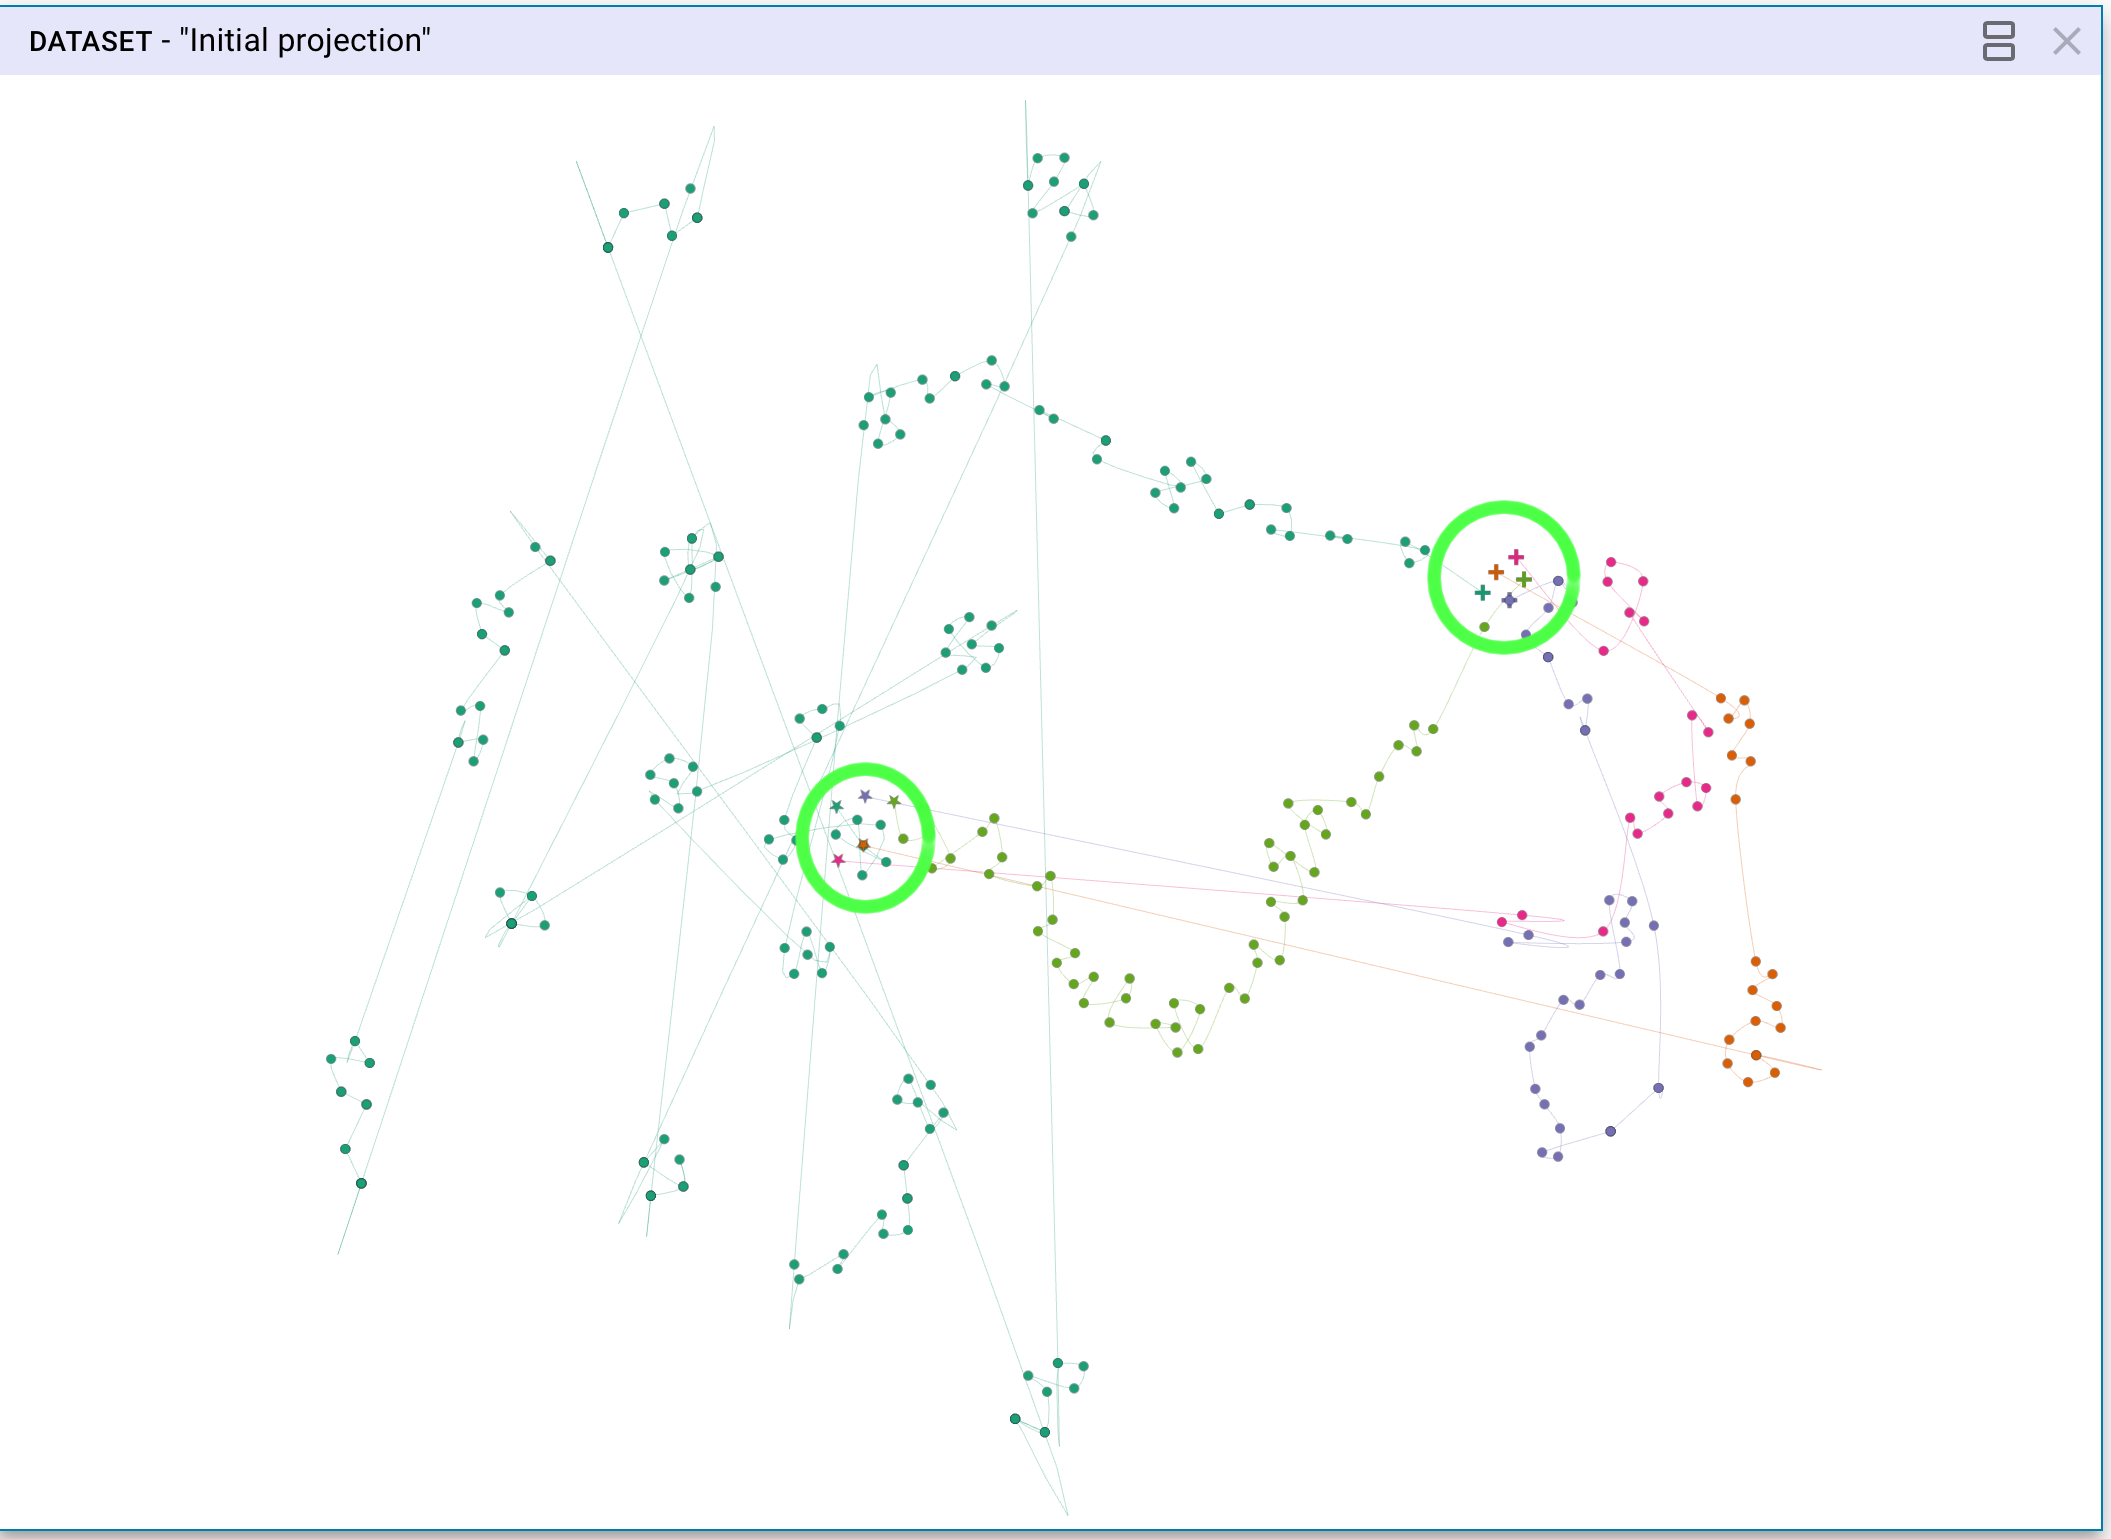

We used the t-SNE data for visualization. t-SNE brings with it the characteristic that identical data samples don't have to be at precisely the same dimensionality reduced point. This becomes clear by the green circles in the screenshot above. They mark the start end end positions. As we use the same unsorted list in the beginning which is in the end correctly sorted in ascending order by all algorithms, it can be shown that the states don't share the identical position in the t-SNE. However, they are really close in space to each other which marks their similarity. 

### Interpretation
- What can be seen in the projection(s)?

> Different algorithms take very different paths of sorting the very same array (which is logical). The start and end states of the sorting process have (as expected) very much the same encoding for every algorithm. It can also be seen that the paths have a great difference in length sometimes which enables to compare the efficiency of the sorting algorithms. Different features like 'depth' for tree-based algorithms can additionally be shown.
 
- Was it what you expected? If not what did you expect?

> The gratest portion was as expected. For example, Heapsort is attention catching in its low-dimensional representation. In more detail it is explained below. Even further, all algorithms reached the correct end state as expected. Note that the end state representations in low dimensionality can slightly vary in its location but represent the identical list which is individually stored by each algorithm.
  
- Can you confirm prior hypotheses from the projection?

> Yes, e.g., the hypothesis that all list-states start and end in the same spot in the projection compared to other algorithms. Furthermore, the states of the list can easily be followed via the lines -> which was also expected.
 
- Did you get any unexpected insights?

> We assumed that Shellsort and Insertionsort would be quite similar in low-dimensional space as Shellsort reused the Insertionsort. Indeed the representations are often closely located. However, they differ in their behavior and can build up clusters in quite different regions. 

> Bubblesort visualizes the meaning of locality quite well. It compares only the neighboring list positions and is therefore already a quite local focused algorithm. When hyperparameters are fixed to affirm locality Bubblesort reacts by building up small clusters which are spread over the low-dimensional visualization.

> Heapsort seems to be the algorithm which goes in its process steps the most straight-forward path to the final end state in low-dimensional representation. An explanation could be that the algorithm builds up a tree which sorts its elements by a fixed logical order. Therefore, the single process steps might be more connected with each other and coming closer to the target by a logical structure. 

## Submission
When you’ve finished working on this assignment please download this notebook as HTML and add it to your repository in addition to the notebook file.